In [2]:
import pandas as pd
dados = pd.read_csv("dados_experimentos.zip", compression = 'zip')
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


<h1 style="color: blue"> Desafio 01: Ordenar o gráfico countplot</h1>
<h1 style="color: blue">Desafio 02: Melhorar a visualização alterando tamanho da fonte</h1>

In [9]:
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)

In [24]:
cod_compostos = dados['composto'].value_counts().index[:5]
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

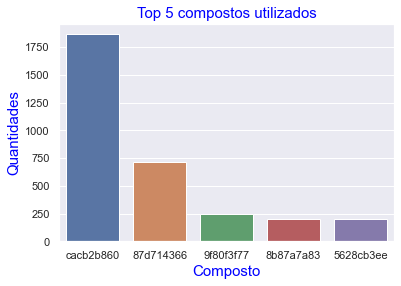

In [45]:
grafico = dados.query('composto in @cod_compostos')
sns.set()
ax=sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'), order=cod_compostos)
plt.xlabel("Composto", fontsize=15, color = 'blue')
plt.ylabel("Quantidades", fontsize=15, color = 'blue')
plt.title("Top 5 compostos utilizados", fontsize=15, color = 'blue')
plt.show()

<h1 style="color: blue"> Desafio 03: Plotar os histogramas com seaborn </h1>

<p style="font-size:1.1em; color: green">Os histogramas são importantes para entendermos as como<br>
um intervalo de valores está distruibúido em determinadas classes</p>

<AxesSubplot:>

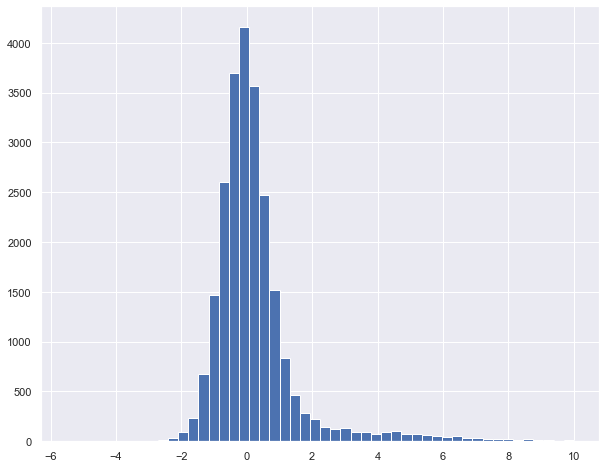

In [56]:
plt.figure(figsize=(10,8))
dados['g-0'].hist(bins=50)

<AxesSubplot:>

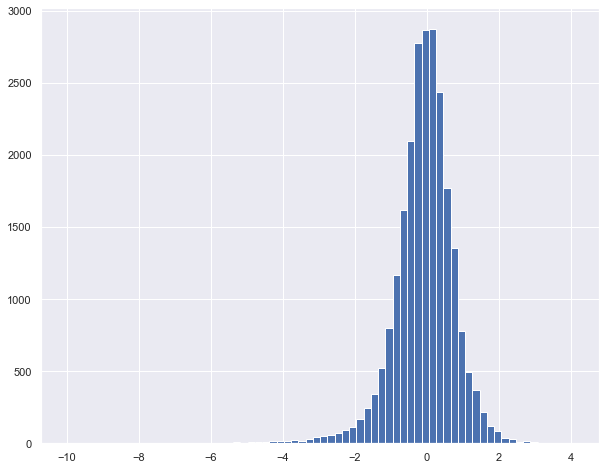

In [61]:
plt.figure(figsize=(10,8))
dados['g-19'].hist(bins=70)

<h1 style="color: blue"> Desafio 04: Estudar sobre as estatíticas retornadas no .describe()</h1>

In [60]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
tempo,23814.0,48.020156,19.402807,24.000,24.000000,48.00000,72.000000,72.000
g-0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g-1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g-2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g-3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
...,...,...,...,...,...,...,...,...
c-95,23814.0,-0.353726,1.629291,-10.000,-0.567975,-0.01025,0.444750,2.814
c-96,23814.0,-0.463485,2.059725,-10.000,-0.552575,-0.00125,0.465225,3.505
c-97,23814.0,-0.378241,1.703615,-10.000,-0.561000,-0.00680,0.446400,2.924
c-98,23814.0,-0.470252,1.834828,-10.000,-0.592600,0.01400,0.461275,3.111


<p style="font-size:18px; color : green">O método <code> .describe() </code> nos exibe informações estatísticas sobre os dados númericos no Dataframe.<br>
essas informações podem ser uteis e são extraídas de maneira simples e direta.</p>

<h1 style="color: blue"> Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.</h1>

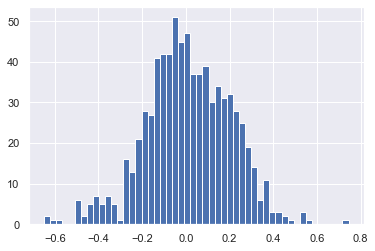

In [78]:
dados.loc[:,'g-0':'g-771'].describe().T['mean'].hist(bins=50)
plt.show()

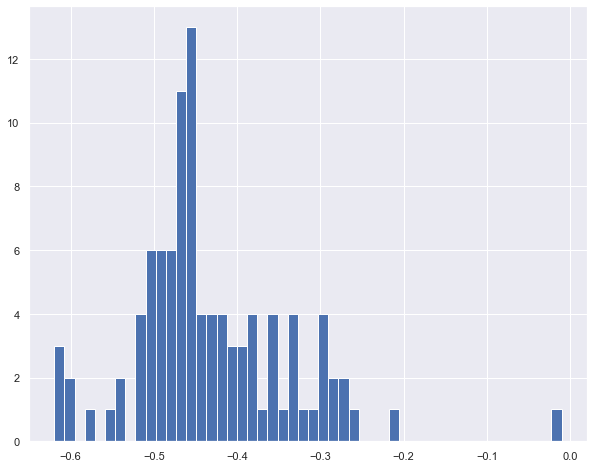

In [64]:
plt.figure(figsize=(10,8))
dados.loc[:,'c-0':'c-99'].describe().T['mean'].hist(bins=50)
plt.show()

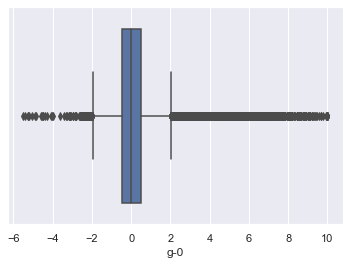

In [66]:
sns.boxplot(x='g-0' , data=dados)
plt.show()

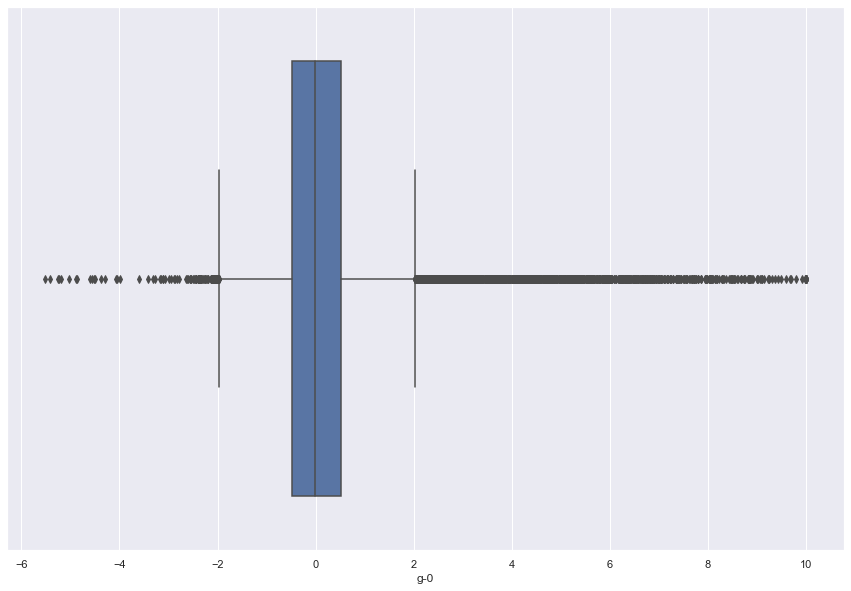

In [77]:
plt.figure(figsize=(15,10))
sns.boxplot(x='g-0' , data=dados)
plt.show()

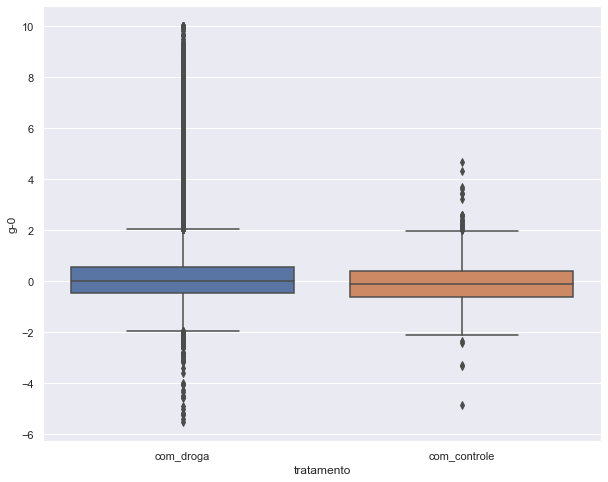

In [80]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g-0', x='tratamento' , data=dados)
plt.show()

<p style="font-size:18px; color: green">Muitas vezes a escala pode distorcer o entendimento do gráfico.<br>
Estas questões estão relacionadas com experiência de usuário e <br>
também com as questões de viewport e elementos de exibição e tranformação.</p>

<h1 style="color: blue"> Desafio 06: Fazer outras análises com o boxplot e até com o histograma.</h1>

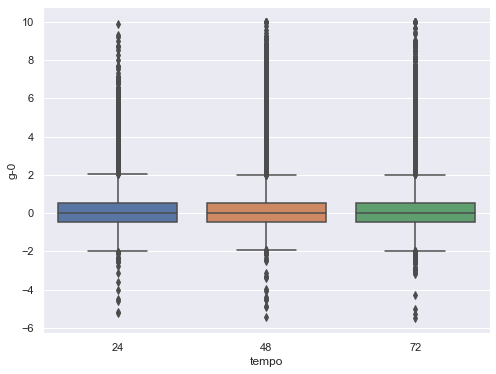

In [104]:
plt.figure(figsize=(8,6))
sns.boxplot(y='g-0', x='tempo' , data=dados)
plt.show()

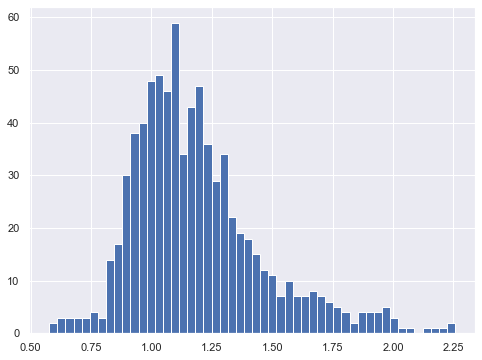

In [105]:
plt.figure(figsize=(8,6))
dados.loc[:,'g-0':'g-771'].describe().T['std'].hist(bins=50)
plt.show()

<h1 style="text-align: left;
  color: blue;"> Desafio 07: Resumo do que você aprendeu com os dados</h1>
<p style="font-size:18px;text-align: left;
  color: green;"> Os dados descrevem informações muito relevantes que podem ser extraídas através de <br> gráficos como o histograma e boxplot,
as informações devem ser exibidas de maneira <br>mais clara e limpa possível, sem distorções ou dificuldades de entendimento.
</p>
<p style="text-align: left; color: red;"> 
    As medidas de dispersão compõem informações extras e podem ser estraídas com o método <code>.describe()</code>
</p>